# Credit EDA Case Study

This case study will give basic understanding of risk analytics in banking and financial services and understand how data is used to minimise the risk of losing money while lending to customers.
<br><br>**Problem Statement 1:**<br><br>When the company receives a loan application, the company has to decide for loan approval based on the applicant’s profile. Two types of risks are associated with the bank’s decision:
<br><br>If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company.
<br>If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to a financial loss for the company.

The data given below contains the information about the loan application at the time of applying for the loan. It contains two types of scenarios:<br>
1. The client with payment difficulties: he/she had late payment more than X days on at least one of the first Y instalments of the loan in our sample,<br>
2. All other cases: All other cases when the payment is paid on time.
<br>
When a client applies for a loan, there are four types of decisions that could be taken by the client/company:

**Approved:** The Company has approved loan Application.<br>
**Cancelled:** The client cancelled the application sometime during approval. Either the client changed her/his mind about the loan or in some cases due to a higher risk of the client he received worse pricing which he did not want.<br>
**Refused:** The company had rejected the loan (because the client does not meet their requirements etc.<br>
**Unused offer:** Loan has been cancelled by the client but on different stages of the process.<br>
<br>
In this case study, we will use EDA to understand how consumer attributes and loan attributes influence the tendency of default.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
Applicants = pd.read_csv("application_data.csv")


In [3]:
df1= pd.read_csv("previous_application.csv")
df1

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1670209,2300464,352015,Consumer loans,14704.290,267295.5,311400.0,0.0,267295.5,WEDNESDAY,12,...,Furniture,30.0,low_normal,POS industry with interest,365243.0,-508.0,362.0,-358.0,-351.0,0.0
1670210,2357031,334635,Consumer loans,6622.020,87750.0,64291.5,29250.0,87750.0,TUESDAY,15,...,Furniture,12.0,middle,POS industry with interest,365243.0,-1604.0,-1274.0,-1304.0,-1297.0,0.0
1670211,2659632,249544,Consumer loans,11520.855,105237.0,102523.5,10525.5,105237.0,MONDAY,12,...,Consumer electronics,10.0,low_normal,POS household with interest,365243.0,-1457.0,-1187.0,-1187.0,-1181.0,0.0
1670212,2785582,400317,Cash loans,18821.520,180000.0,191880.0,NaN,180000.0,WEDNESDAY,9,...,XNA,12.0,low_normal,Cash X-Sell: low,365243.0,-1155.0,-825.0,-825.0,-817.0,1.0


In [4]:
Applicants.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [5]:
Applicants.shape

(307511, 122)

In [6]:
Applicants.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


In [7]:
Applicants.dtypes

SK_ID_CURR                      int64
TARGET                          int64
NAME_CONTRACT_TYPE             object
CODE_GENDER                    object
FLAG_OWN_CAR                   object
                               ...   
AMT_REQ_CREDIT_BUREAU_DAY     float64
AMT_REQ_CREDIT_BUREAU_WEEK    float64
AMT_REQ_CREDIT_BUREAU_MON     float64
AMT_REQ_CREDIT_BUREAU_QRT     float64
AMT_REQ_CREDIT_BUREAU_YEAR    float64
Length: 122, dtype: object

In [8]:
Applicants.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=122)

## Finding the missing values

In [9]:
Applicants.isnull().sum().sort_values(ascending=False).head(60)

COMMONAREA_MEDI                 214865
COMMONAREA_AVG                  214865
COMMONAREA_MODE                 214865
NONLIVINGAPARTMENTS_MODE        213514
NONLIVINGAPARTMENTS_AVG         213514
NONLIVINGAPARTMENTS_MEDI        213514
FONDKAPREMONT_MODE              210295
LIVINGAPARTMENTS_MODE           210199
LIVINGAPARTMENTS_AVG            210199
LIVINGAPARTMENTS_MEDI           210199
FLOORSMIN_AVG                   208642
FLOORSMIN_MODE                  208642
FLOORSMIN_MEDI                  208642
YEARS_BUILD_MEDI                204488
YEARS_BUILD_MODE                204488
YEARS_BUILD_AVG                 204488
OWN_CAR_AGE                     202929
LANDAREA_MEDI                   182590
LANDAREA_MODE                   182590
LANDAREA_AVG                    182590
BASEMENTAREA_MEDI               179943
BASEMENTAREA_AVG                179943
BASEMENTAREA_MODE               179943
EXT_SOURCE_1                    173378
NONLIVINGAREA_MODE              169682
NONLIVINGAREA_AVG        

In [10]:
A= Applicants.count()/len(Applicants)
missing_applicants = (1-A)*100
missing_applicants.sort_values(ascending= False).head(60)

COMMONAREA_MEDI                 69.872297
COMMONAREA_AVG                  69.872297
COMMONAREA_MODE                 69.872297
NONLIVINGAPARTMENTS_MODE        69.432963
NONLIVINGAPARTMENTS_AVG         69.432963
NONLIVINGAPARTMENTS_MEDI        69.432963
FONDKAPREMONT_MODE              68.386172
LIVINGAPARTMENTS_MODE           68.354953
LIVINGAPARTMENTS_AVG            68.354953
LIVINGAPARTMENTS_MEDI           68.354953
FLOORSMIN_AVG                   67.848630
FLOORSMIN_MODE                  67.848630
FLOORSMIN_MEDI                  67.848630
YEARS_BUILD_MEDI                66.497784
YEARS_BUILD_MODE                66.497784
YEARS_BUILD_AVG                 66.497784
OWN_CAR_AGE                     65.990810
LANDAREA_MEDI                   59.376738
LANDAREA_MODE                   59.376738
LANDAREA_AVG                    59.376738
BASEMENTAREA_MEDI               58.515956
BASEMENTAREA_AVG                58.515956
BASEMENTAREA_MODE               58.515956
EXT_SOURCE_1                    56

In [11]:
# Here we can see that there are more no. of columns having missing values. Almost 50% of values are missing in many columns,
# also from above the column --EMERGENCYSTATE_MODE also has 47% missing values near to 50% it will be difficult to replace the 
# almost half the values from that columns so  we are not considering the above columns having 50% or nearby 50% missing values in
# in further analysis.

In [12]:
 Applicants.drop(["COMMONAREA_MEDI","COMMONAREA_AVG","COMMONAREA_MODE","NONLIVINGAPARTMENTS_MODE", "NONLIVINGAPARTMENTS_AVG",
                "NONLIVINGAPARTMENTS_MEDI","FONDKAPREMONT_MODE","LIVINGAPARTMENTS_MODE","LIVINGAPARTMENTS_AVG",
                 "LIVINGAPARTMENTS_MEDI","FLOORSMIN_AVG", "FLOORSMIN_MODE", "FLOORSMIN_MEDI","YEARS_BUILD_MEDI",
                 "YEARS_BUILD_MODE","YEARS_BUILD_AVG", "OWN_CAR_AGE", "LANDAREA_MEDI","LANDAREA_MODE","LANDAREA_AVG",
                "BASEMENTAREA_MEDI", "BASEMENTAREA_AVG","BASEMENTAREA_MODE","EXT_SOURCE_1","NONLIVINGAREA_MODE","NONLIVINGAREA_AVG","NONLIVINGAREA_MEDI",
"ELEVATORS_MEDI","ELEVATORS_AVG","ELEVATORS_MODE","WALLSMATERIAL_MODE","APARTMENTS_MEDI","APARTMENTS_AVG","APARTMENTS_MODE",
"ENTRANCES_MEDI","ENTRANCES_AVG","ENTRANCES_MODE","LIVINGAREA_AVG","LIVINGAREA_MODE","LIVINGAREA_MEDI","HOUSETYPE_MODE",
"FLOORSMAX_MODE","FLOORSMAX_MEDI","FLOORSMAX_AVG","YEARS_BEGINEXPLUATATION_MODE","YEARS_BEGINEXPLUATATION_MEDI",
"YEARS_BEGINEXPLUATATION_AVG","TOTALAREA_MODE" ,"EMERGENCYSTATE_MODE"], axis = 1, inplace = True)

In [13]:
Applicants.shape

(307511, 73)

In [14]:
# Now we have drop all the columns which had missing values. Next we need to remove all the missing values from remaining columns.

# Analysing the remaining columns

In [15]:
Applicants["OCCUPATION_TYPE"]

0            Laborers
1          Core staff
2            Laborers
3            Laborers
4          Core staff
             ...     
307506    Sales staff
307507            NaN
307508       Managers
307509       Laborers
307510       Laborers
Name: OCCUPATION_TYPE, Length: 307511, dtype: object

In [16]:
# Occupation column is Category/classification column so we can't add the category of applicants with any value. So we will not
# be making any changes to above column.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 [Text(0, 0, 'Laborers'),
  Text(1, 0, 'Core staff'),
  Text(2, 0, 'Accountants'),
  Text(3, 0, 'Managers'),
  Text(4, 0, 'Drivers'),
  Text(5, 0, 'Sales staff'),
  Text(6, 0, 'Cleaning staff'),
  Text(7, 0, 'Cooking staff'),
  Text(8, 0, 'Private service staff'),
  Text(9, 0, 'Medicine staff'),
  Text(10, 0, 'Security staff'),
  Text(11, 0, 'High skill tech staff'),
  Text(12, 0, 'Waiters/barmen staff'),
  Text(13, 0, 'Low-skill Laborers'),
  Text(14, 0, 'Realty agents'),
  Text(15, 0, 'Secretaries'),
  Text(16, 0, 'IT staff'),
  Text(17, 0, 'HR staff')])

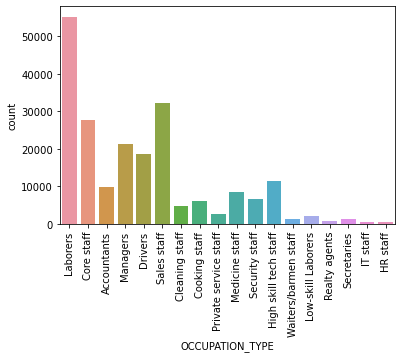

In [17]:
sns.countplot(Applicants["OCCUPATION_TYPE"])
plt.xticks(rotation = 90)

In [18]:
# As i stated above that this column is having may missing values, and also from the plot also we say that large number of 
# applicants are Labourer's so we cannot replace the missing values of other applicants as Labourers. So we will be keeping this
# column as it is.

In [19]:
# NEXT COLUMN: EXT_SOURCE_3 

In [20]:
Applicants["EXT_SOURCE_3"]

0         0.139376
1              NaN
2         0.729567
3              NaN
4              NaN
            ...   
307506         NaN
307507         NaN
307508    0.218859
307509    0.661024
307510    0.113922
Name: EXT_SOURCE_3, Length: 307511, dtype: float64

<AxesSubplot:ylabel='Frequency'>

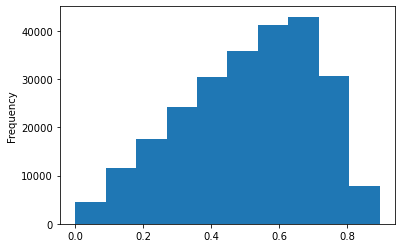

In [21]:
Applicants["EXT_SOURCE_3"].plot.hist()

In [22]:
# Here we can see that the plot is on the right side, i.e.,little skewed on the right side but the value of mean and median comes
# out to be almost same which can be seen below. Thus we can say that it is normally distributed.

In [23]:
Applicants["EXT_SOURCE_3"].describe()

count    246546.000000
mean          0.510853
std           0.194844
min           0.000527
25%           0.370650
50%           0.535276
75%           0.669057
max           0.896010
Name: EXT_SOURCE_3, dtype: float64

In [24]:
# NEXT COLUMN: AMT_REQ_CREDIT_BUREAU_HOUR

In [25]:
Applicants["AMT_REQ_CREDIT_BUREAU_HOUR"]

0         0.0
1         0.0
2         0.0
3         NaN
4         0.0
         ... 
307506    NaN
307507    NaN
307508    1.0
307509    0.0
307510    0.0
Name: AMT_REQ_CREDIT_BUREAU_HOUR, Length: 307511, dtype: float64

In [26]:
b = len(Applicants["AMT_REQ_CREDIT_BUREAU_HOUR"].unique())

<AxesSubplot:ylabel='Frequency'>

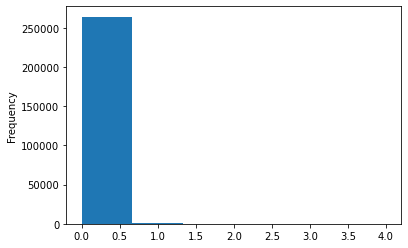

In [27]:
Applicants["AMT_REQ_CREDIT_BUREAU_HOUR"].plot.hist(bins = b)

In [28]:
#

In [29]:
Applicants["AMT_REQ_CREDIT_BUREAU_HOUR"].value_counts()

0.0    264366
1.0      1560
2.0        56
3.0         9
4.0         1
Name: AMT_REQ_CREDIT_BUREAU_HOUR, dtype: int64

In [30]:
c = len(Applicants["AMT_REQ_CREDIT_BUREAU_DAY"].unique())
c

10

<AxesSubplot:ylabel='Frequency'>

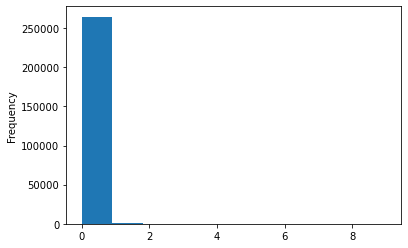

In [31]:
Applicants["AMT_REQ_CREDIT_BUREAU_DAY"].plot.hist(bins = c)

In [32]:
Applicants["AMT_REQ_CREDIT_BUREAU_DAY"].value_counts()

0.0    264503
1.0      1292
2.0       106
3.0        45
4.0        26
5.0         9
6.0         8
9.0         2
8.0         1
Name: AMT_REQ_CREDIT_BUREAU_DAY, dtype: int64

In [33]:
# Column : AMT_REQ_CREDIT_BUREAU_WEEK

In [34]:
Applicants["AMT_REQ_CREDIT_BUREAU_WEEK"].value_counts()

0.0    257456
1.0      8208
2.0       199
3.0        58
4.0        34
6.0        20
5.0        10
8.0         5
7.0         2
Name: AMT_REQ_CREDIT_BUREAU_WEEK, dtype: int64

In [35]:
d = len(Applicants["AMT_REQ_CREDIT_BUREAU_WEEK"].unique())

<AxesSubplot:ylabel='Frequency'>

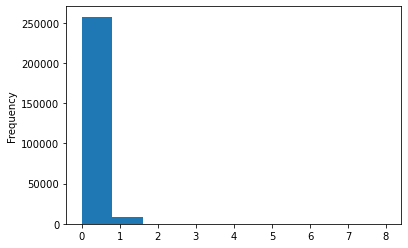

In [36]:
Applicants["AMT_REQ_CREDIT_BUREAU_WEEK"].plot.hist(bins = d)

In [37]:
# Column : AMT_REQ_CREDIT_BUREAU_MON

<AxesSubplot:ylabel='Frequency'>

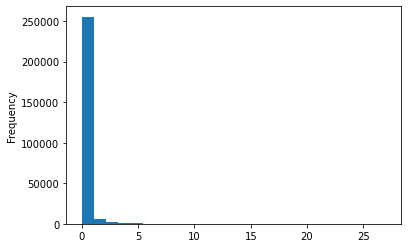

In [38]:
e = len(Applicants["AMT_REQ_CREDIT_BUREAU_MON"].unique())
Applicants["AMT_REQ_CREDIT_BUREAU_MON"].plot.hist(bins = e)

In [39]:
# Column : AMT_REQ_CREDIT_BUREAU_QRT

<AxesSubplot:ylabel='Frequency'>

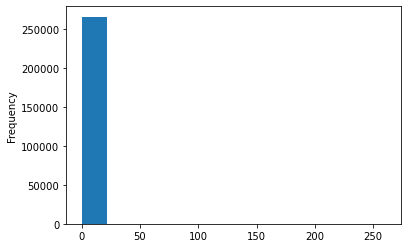

In [40]:
f = len(Applicants["AMT_REQ_CREDIT_BUREAU_QRT"].unique())
Applicants["AMT_REQ_CREDIT_BUREAU_QRT"].plot.hist(bins = f)

In [41]:
# Column : AMT_REQ_CREDIT_BUREAU_YEAR

<AxesSubplot:ylabel='Frequency'>

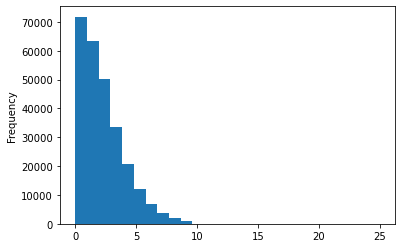

In [42]:
g = len(Applicants["AMT_REQ_CREDIT_BUREAU_YEAR"].unique())
Applicants["AMT_REQ_CREDIT_BUREAU_YEAR"].plot.hist(bins = g)

In [43]:
Applicants["AMT_REQ_CREDIT_BUREAU_YEAR"].describe()

count    265992.000000
mean          1.899974
std           1.869295
min           0.000000
25%           0.000000
50%           1.000000
75%           3.000000
max          25.000000
Name: AMT_REQ_CREDIT_BUREAU_YEAR, dtype: float64

In [44]:
Applicants["AMT_REQ_CREDIT_BUREAU_YEAR"].mode()[0]

0.0

In [45]:
Applicants["AMT_REQ_CREDIT_BUREAU_YEAR"] = Applicants["AMT_REQ_CREDIT_BUREAU_YEAR"].fillna(Applicants["AMT_REQ_CREDIT_BUREAU_YEAR"].mode()[0])

In [46]:
Applicants["AMT_REQ_CREDIT_BUREAU_YEAR"].isna().sum()

0

In [47]:
# Here we have replaced the null values with the mode value.

## Now we need to check how many applicants are there with payment difficuties

In [48]:
Applicants["TARGET"].count()

307511

In [49]:
Applicants["TARGET"].isna().sum()

0

- Below is no. of customers facing payment difficulties

In [50]:
(Applicants["TARGET"]==1).sum()

24825

- Clients who can pay

In [51]:
(Applicants["TARGET"]==0).sum()

282686

Text(0.5, 1.0, 'Target Column')

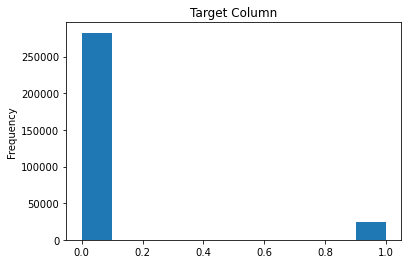

In [52]:
Applicants["TARGET"].plot.hist()
plt.title("Target Column")

- Here we can obsereve difference in clients with payment difficulties and who can pay, we can say that the data is imbalance

In [53]:
# Ratio of imbalance

In [54]:
(Applicants["TARGET"]==0).sum()/(Applicants["TARGET"]==1).sum()

11.387150050352467

- Now Analysis the Outliers if any

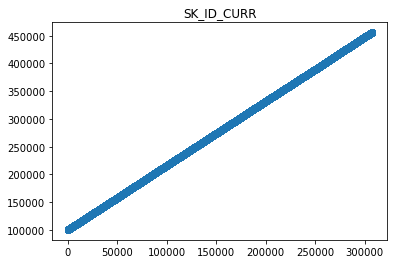

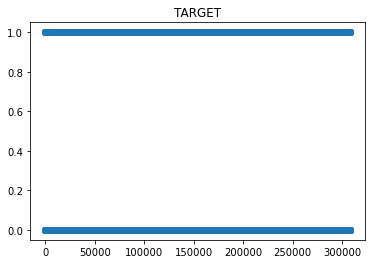

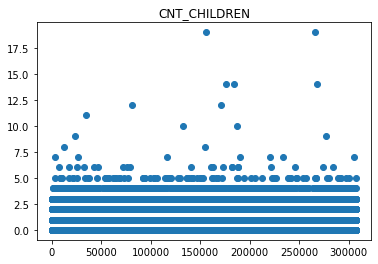

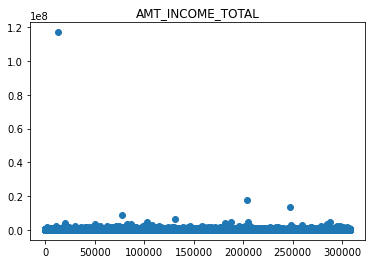

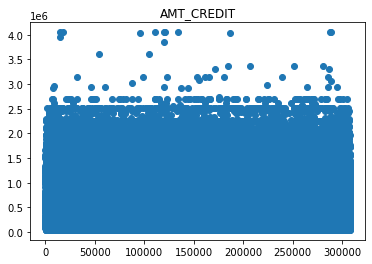

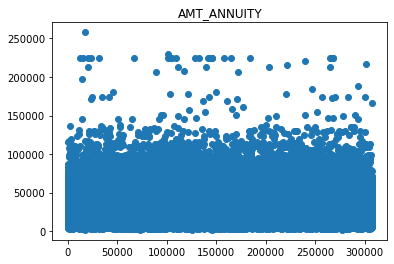

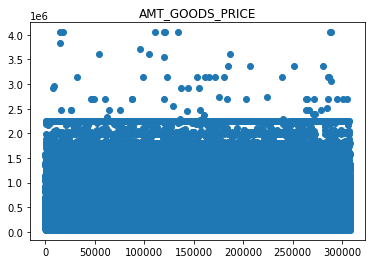

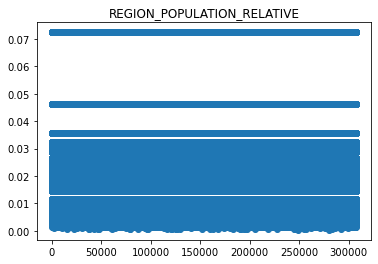

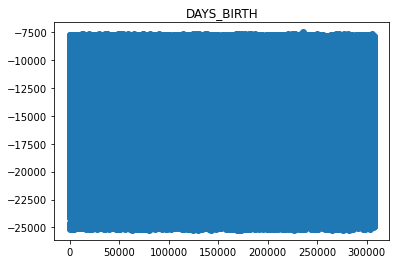

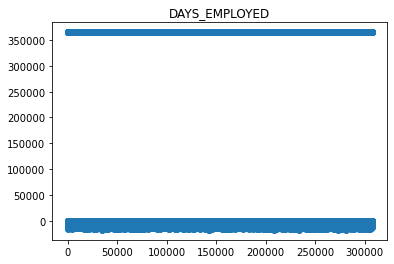

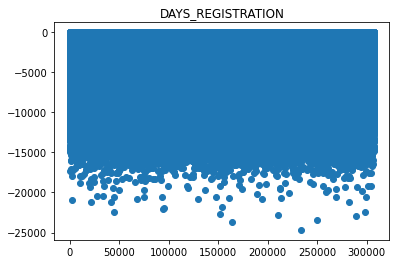

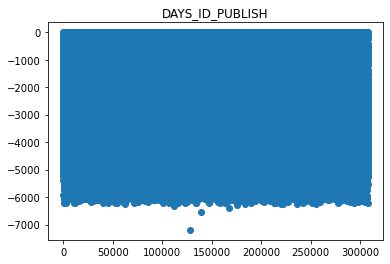

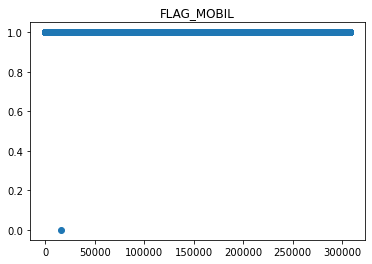

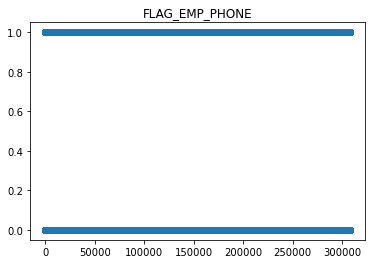

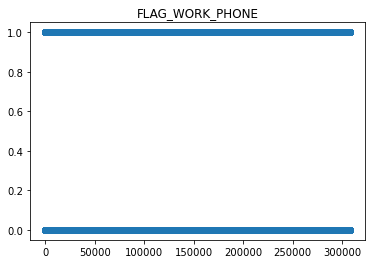

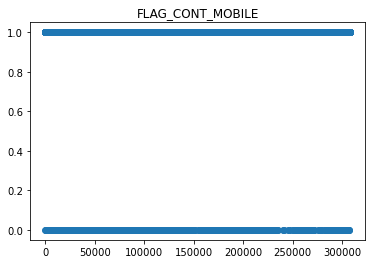

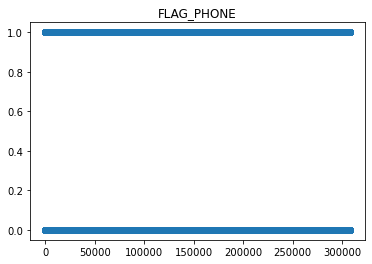

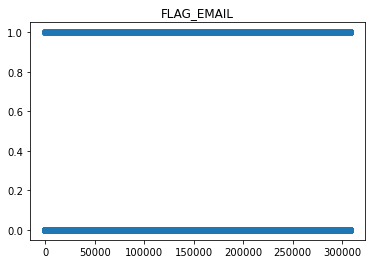

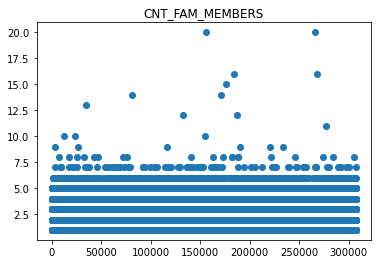

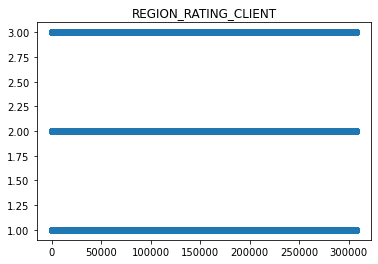

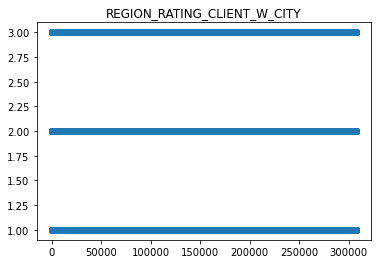

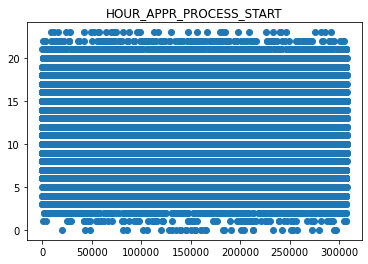

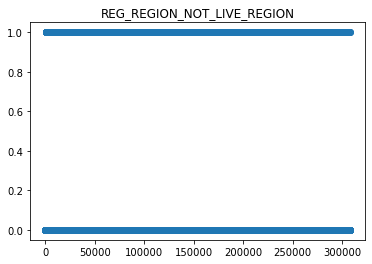

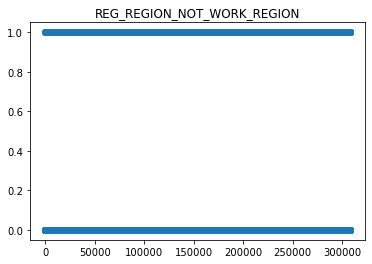

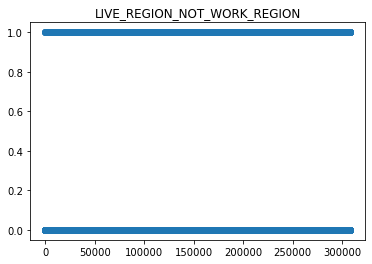

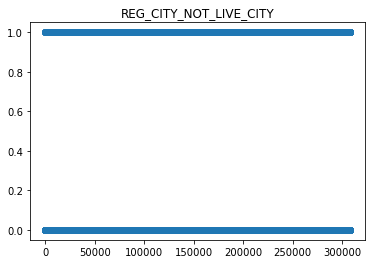

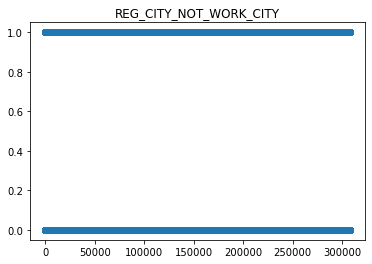

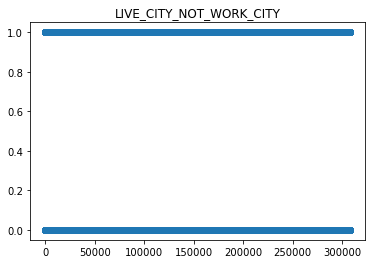

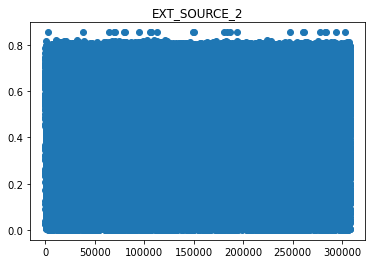

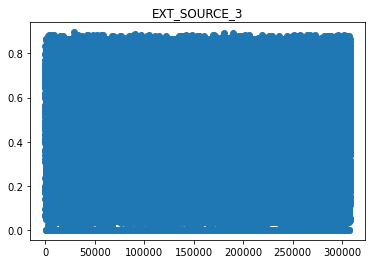

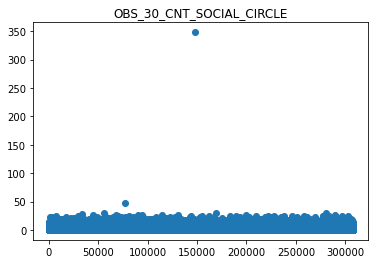

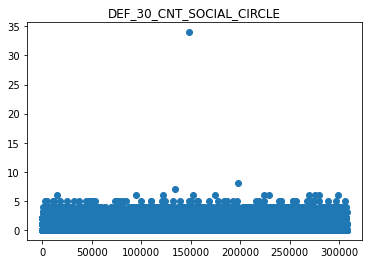

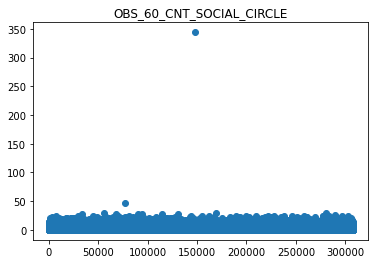

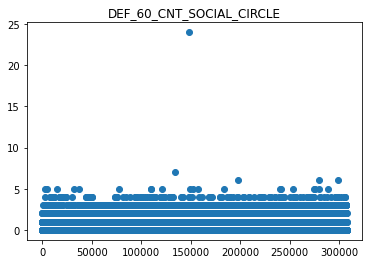

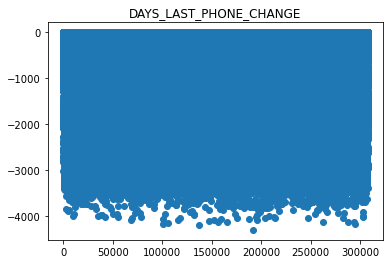

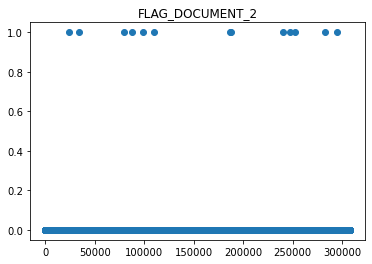

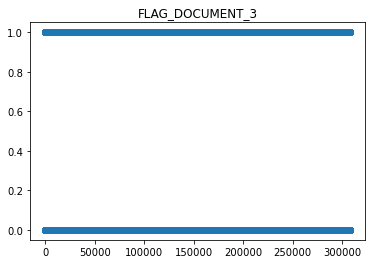

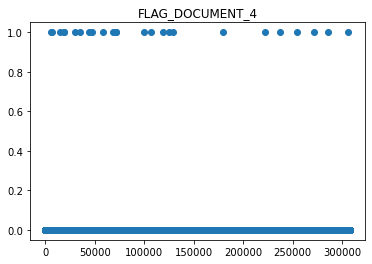

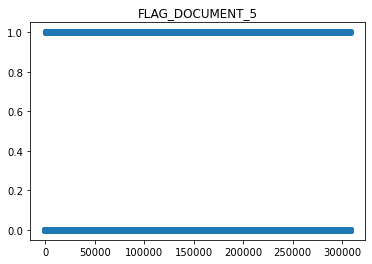

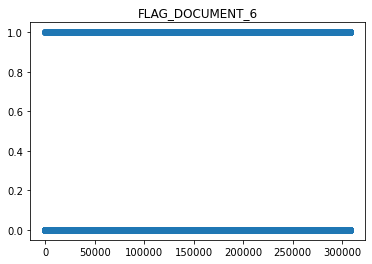

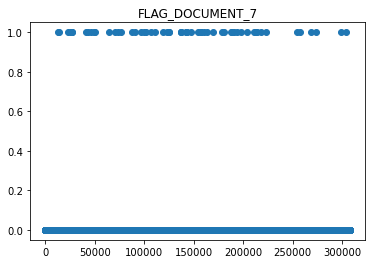

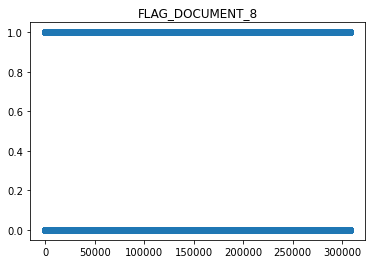

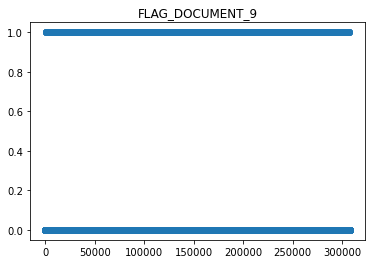

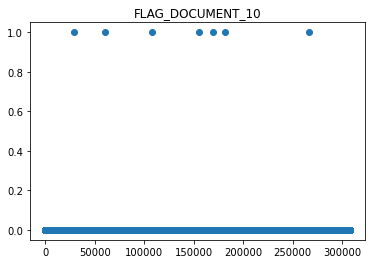

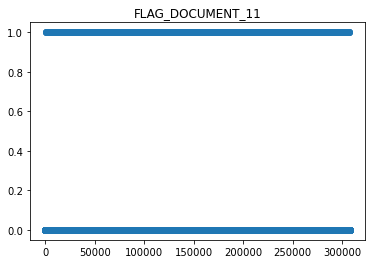

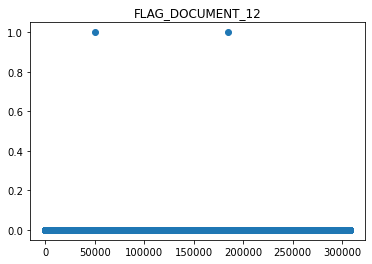

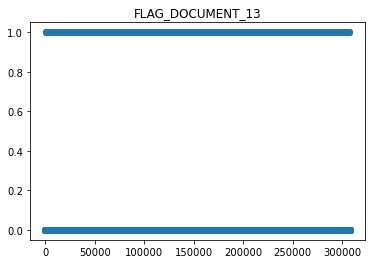

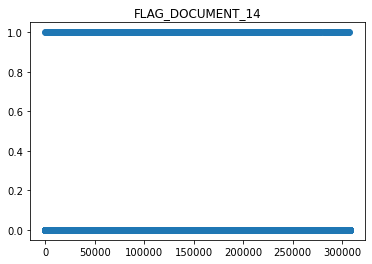

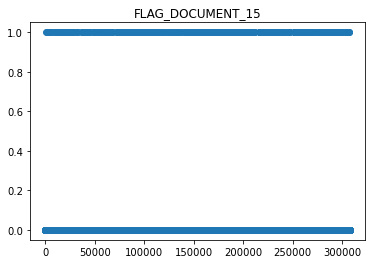

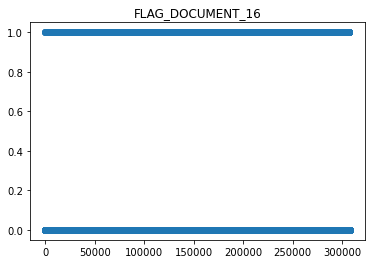

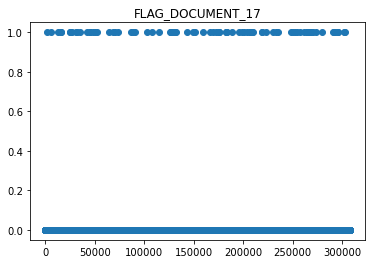

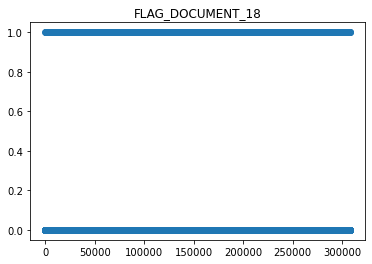

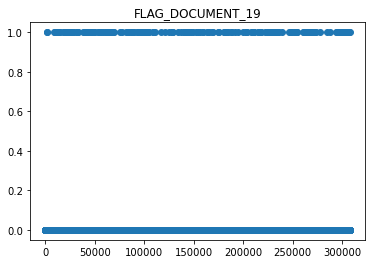

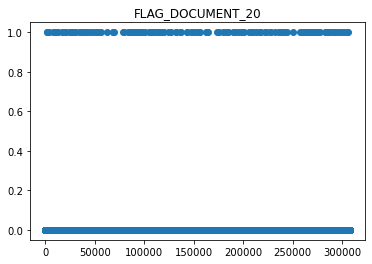

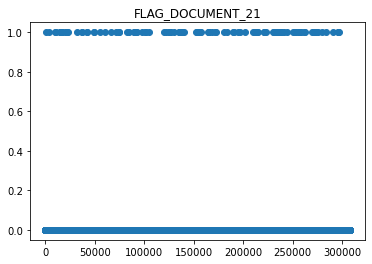

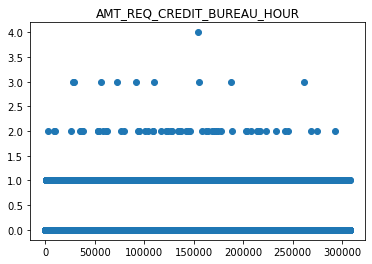

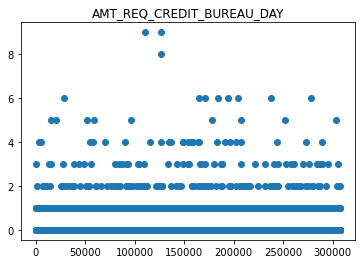

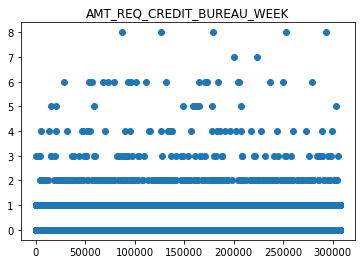

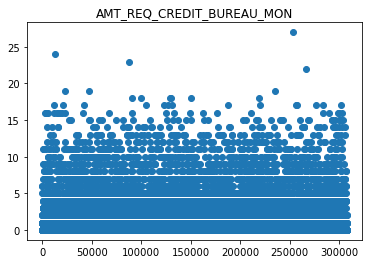

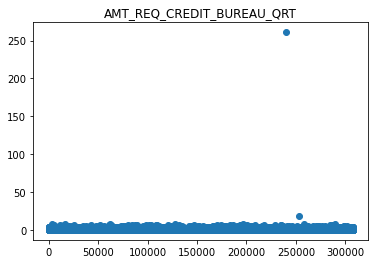

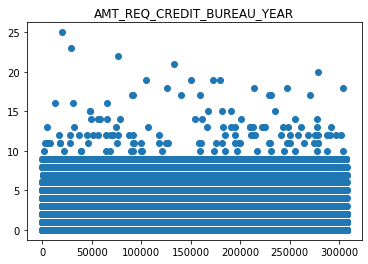

In [55]:
App1 = Applicants.select_dtypes(include= ["int64", "float64"]).columns
for column in App1:
    title = "" + column
    plt.scatter(Applicants.index, Applicants[column])
    plt.title(title)
    plt.show()

In [56]:
Applicants["CNT_CHILDREN"].sort_values()

0          0
186892     0
186893     0
186894     0
186895     0
          ..
176011    14
183878    14
267998    14
155369    19
265784    19
Name: CNT_CHILDREN, Length: 307511, dtype: int64

- Above we have plot all columns to get the outliers and by oberving the plots there are few columns which contais the outliers.
- we can see that column CNT_CHILDREN has few ouliers showning values above 10, i.e clients having children more than 10 which seems to be false entry.
- Also another column named AMT_INCOME_TOTAL, one value is around 1.2 which is the only value far away from other values.
- FLAG_MOBIL, CNT_SOCIAL_CIRCLE ARE THE COLUMN HAVING OUTLIERS


In [57]:
irrev = ["EXT_SOURCE_3","EXT_SOURCE_2"]  # putting irrevlent columns in "irrev"

# Starting with EXT_SOURCE_3 , EXT_SOURCE_2. As they have normalised values, now we will understand the relation between
# these columns with TARGET column using a heatmap


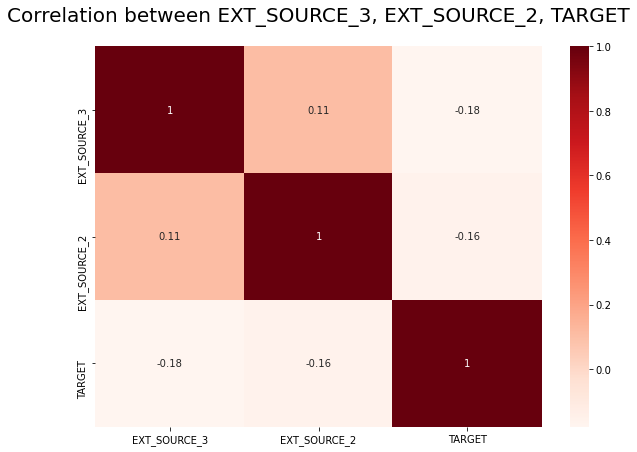

In [58]:
plt.figure(figsize= [10,7])

sns.heatmap(Applicants[irrev+["TARGET"]].corr(), cmap="Reds",annot=True)

plt.title("Correlation between EXT_SOURCE_3, EXT_SOURCE_2, TARGET", fontdict={"fontsize":20}, pad=25)
plt.show()

# Analysis on previous application

In [59]:
df1

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1670209,2300464,352015,Consumer loans,14704.290,267295.5,311400.0,0.0,267295.5,WEDNESDAY,12,...,Furniture,30.0,low_normal,POS industry with interest,365243.0,-508.0,362.0,-358.0,-351.0,0.0
1670210,2357031,334635,Consumer loans,6622.020,87750.0,64291.5,29250.0,87750.0,TUESDAY,15,...,Furniture,12.0,middle,POS industry with interest,365243.0,-1604.0,-1274.0,-1304.0,-1297.0,0.0
1670211,2659632,249544,Consumer loans,11520.855,105237.0,102523.5,10525.5,105237.0,MONDAY,12,...,Consumer electronics,10.0,low_normal,POS household with interest,365243.0,-1457.0,-1187.0,-1187.0,-1181.0,0.0
1670212,2785582,400317,Cash loans,18821.520,180000.0,191880.0,NaN,180000.0,WEDNESDAY,9,...,XNA,12.0,low_normal,Cash X-Sell: low,365243.0,-1155.0,-825.0,-825.0,-817.0,1.0


In [60]:
df1.shape

(1670214, 37)

In [61]:
df1.columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY',
       'RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY',
       'RATE_INTEREST_PRIVILEGED', 'NAME_CASH_LOAN_PURPOSE',
       'NAME_CONTRACT_STATUS', 'DAYS_DECISION', 'NAME_PAYMENT_TYPE',
       'CODE_REJECT_REASON', 'NAME_TYPE_SUITE', 'NAME_CLIENT_TYPE',
       'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE',
       'CHANNEL_TYPE', 'SELLERPLACE_AREA', 'NAME_SELLER_INDUSTRY',
       'CNT_PAYMENT', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION',
       'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION',
       'DAYS_LAST_DUE', 'DAYS_TERMINATION', 'NFLAG_INSURED_ON_APPROVAL'],
      dtype='object')

In [62]:
df1.SK_ID_PREV.value_counts()

1001961    1
1210139    1
1279781    1
1281828    1
1292067    1
          ..
2444802    1
2446849    1
2448896    1
1024863    1
1000983    1
Name: SK_ID_PREV, Length: 1670214, dtype: int64

In [63]:
df1.SK_ID_CURR.value_counts()

187868    77
265681    73
173680    72
242412    68
206783    67
          ..
310932     1
308885     1
317081     1
335520     1
350314     1
Name: SK_ID_CURR, Length: 338857, dtype: int64

- we can see that the length of SK_ID_CURR, SK_ID_PREV are different so we can say that there might be duplicates